# Build Linear Regression Model in Python

# Import library

In [59]:
# we will import a built in dataset from a python library from sklearn
from sklearn import datasets

# import dataset

In [60]:
diabetes = datasets.load_diabetes()

In [61]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## Description of the Diabetes dataset

In [62]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [63]:
# We will look at the feature names
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Create X and Y matrices

In [64]:
X = diabetes.data
Y = diabetes.target

In [65]:
X.shape, Y.shape

((442, 10), (442,))

# Data Split

In [66]:
from sklearn.model_selection import train_test_split

## Perform 80/20 data split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [68]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [69]:
# Import additional required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Create and train the linear regression model

In [70]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [71]:
# Make predictions
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

### Model Evaluation

In [72]:
train_mse = mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(Y_train, Y_pred_train)
test_r2 = r2_score(Y_test, Y_pred_test)

### Print model Performance Metrics

In [73]:
print("Model Performance Metrics:")
print("--------------------------")
print(f"Training RMSE: {train_mse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R2: {train_r2:.4f}")
print(f"Testing R2: {test_r2:.4f}")


Model Performance Metrics:
--------------------------
Training RMSE: 2809.10
Testing RMSE: 55.87
Training R2: 0.5275
Testing R2: 0.4571


### Feature Important Analysis

In [74]:
feature_importance = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

### Visualize Feature Importance

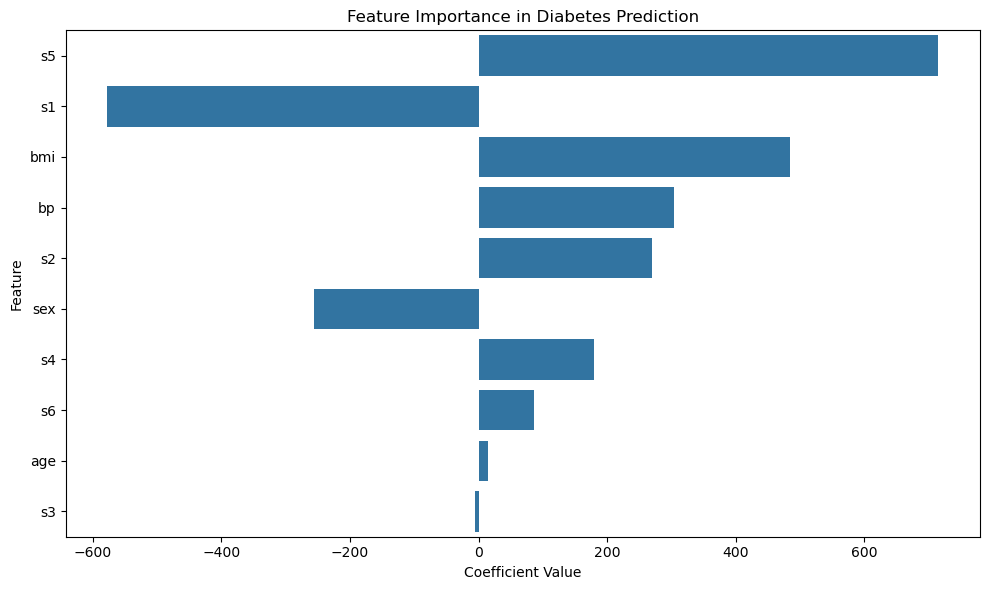

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

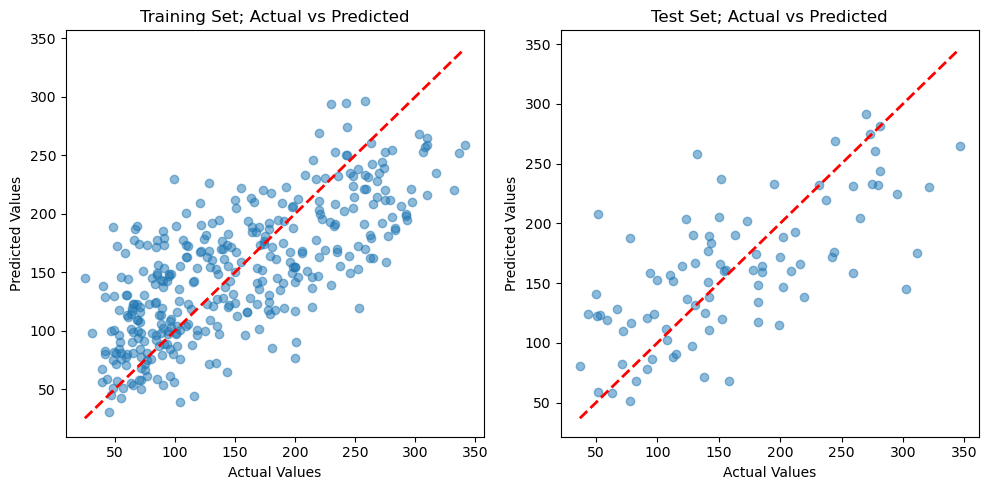

In [76]:
# Scatter plot of the predicted vs actual values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_pred_train, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set; Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_test, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set; Actual vs Predicted')

plt.tight_layout()
plt.show()


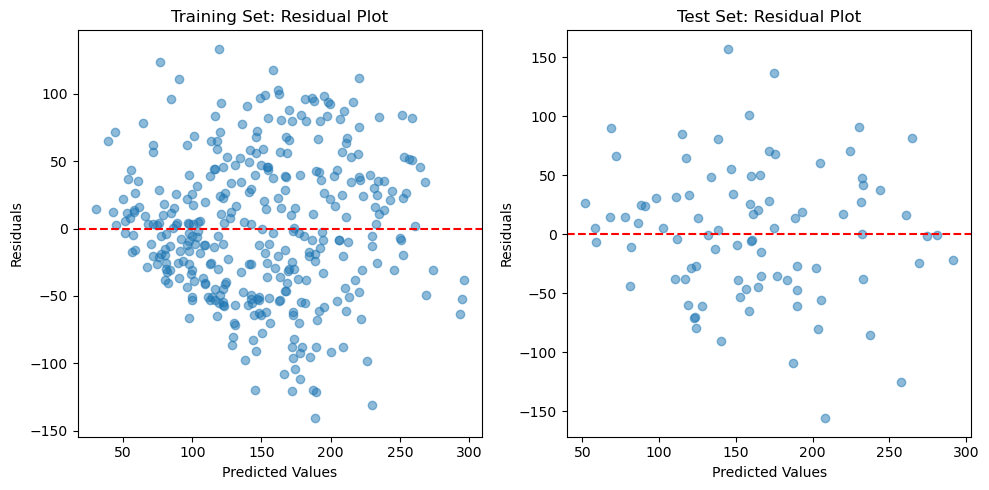

In [77]:
# Residual plot
residuals_train = Y_train - Y_pred_train
residuals_test = Y_test - Y_pred_test

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_pred_train, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Set: Residual Plot')

plt.subplot(1, 2, 2)
plt.scatter(Y_pred_test, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Set: Residual Plot')

plt.tight_layout()
plt.show()



This code provides a complete linear regression analysis including:


1. Model building and training

2. Prediction on both training and test sets

3. Model evaluation using RMSE and R² metrics

4. Feature importance analysis with visualization

5. Actual vs Predicted value plots

6. Residual analysis plots


The visualizations will helped in:



- Understanding which features are most important for prediction
- Seeing how well the model fits the data
- Identifying any patterns in prediction errors
- Checking for homoscedasticity (constant variance of residuals)


You can interpret the results as follows:



- Lower RMSE values indicate better model performance
- R² values closer to 1 indicate better fit
- The feature importance plot shows which variables have the strongest impact on predictions
- The residual plots should show random scatter around zero for a good model